## Libraries Used

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

## Import the Dataset

In [3]:
df = pd.read_csv('dataset/Bengaluru_House_Data.csv')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Exploratory Data Analysis

There are 13320 observations in the dataset with each having 9 columns. 8 of them are predictor variables and 1 being target variable [Price].

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


-------------------------------------------
Location, Size, Society, Bath and Balcony features have missing values. But number of missing values for location, size, bath and balcony are not much. Society has maximum missing values and we need to decide whether to drop the feature or imput it.

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
df.describe(include=['O'])

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


-------
There are four different type of areas with 'Super built-up Area' having the maximum count. And there are no missing values. We can convert this feature into dummy variables.

In [9]:
# count of various area types
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<AxesSubplot:xlabel='area_type', ylabel='count'>

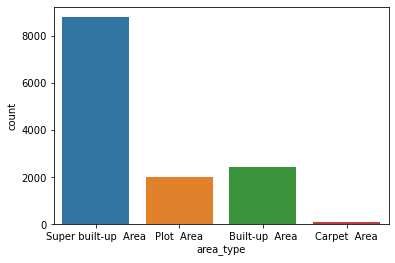

In [10]:
sns.countplot(x='area_type', data=df)

----
There are 81 different types of values for 'availability'. And for me this feature won't be useful in deciding the price of a house. So we will drop it in the data cleaning step

In [11]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Dec               1
16-Nov               1
17-Jan               1
14-Jul               1
15-Jun               1
Name: availability, Length: 81, dtype: int64

------
There are 4 different values for balconies a house has. 2 and 1 being the most common ones. There are many houses that do not have a balcony and there are 609 missing values. This number is comparatively less than the total number of observations, hence, we can drop those observations.

In [12]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

<AxesSubplot:xlabel='balcony', ylabel='count'>

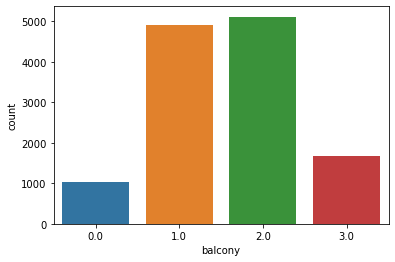

In [13]:
sns.countplot(x='balcony', data=df)

<AxesSubplot:xlabel='price', ylabel='Count'>

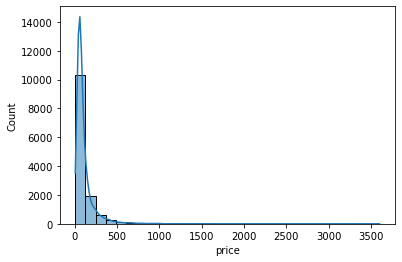

In [14]:
# distribution of price variable
sns.histplot(x='price', data=df, kde=True, bins=30)

---
Size variable has lot of different values which is not required at all. Also there are lot of outliers

In [15]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

---
There are 2688 different 'society' values with 1524 having a single observation. So I have decided to drop it.

In [16]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
Salesni     1
SneurGr     1
Aahts H     1
Dhows M     1
Shaceop     1
Name: society, Length: 2688, dtype: int64

In [17]:
sum(df['society'].value_counts() == 1)

1524

----
There seemed to be a lot of outliers in for bath observation. It needs to worked on

In [18]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

<AxesSubplot:xlabel='bath', ylabel='count'>

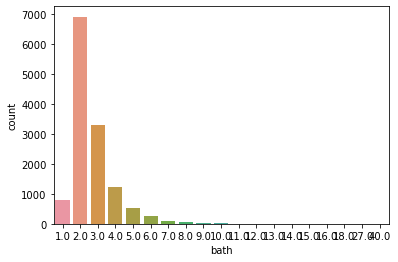

In [19]:
sns.countplot(x='bath', data=df)

---
'total_sqft' require a lot of cleaning. Firstly these are objects, secondly there are ranges given which needs to be converted into single number.

In [20]:
df['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [21]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

## Data Cleaning

Decided to drop Availability, society

In [22]:
df.drop(['availability', 'society'], axis=1, inplace = True)

In [23]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [24]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

--- 
Decided to drop observations having missing value. A total of 610 observations were dropped which is relatively smaller compared to the size of the dataset.

In [25]:
df.dropna(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12710 non-null  object 
 1   location    12710 non-null  object 
 2   size        12710 non-null  object 
 3   total_sqft  12710 non-null  object 
 4   bath        12710 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       12710 non-null  float64
dtypes: float64(3), object(4)
memory usage: 794.4+ KB


---
There are few problems with the total_sqft variable. There are cases where 'sq meters, perch' terms are used with the number

In [27]:
def is_float(x):
    '''Returns true if x if float or else returns false'''
    try:
        float(x)
    except:
        return False
    return True

In [28]:
# check how many object values in the 'total_sqrt' variable are ranges
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000
772,Super built-up Area,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935


In [29]:
# convert object into floats, convert ranges into average value
def convert_sqft_to_num(x):
    numbers = x.split("-")
    if(len(numbers) == 2):
        return (float(numbers[0]) + float(numbers[1])) / 2
    try:
        return float(x)
    except:
        return None

In [30]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [31]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12710 non-null  object 
 1   location    12710 non-null  object 
 2   size        12710 non-null  object 
 3   total_sqft  12668 non-null  float64
 4   bath        12710 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       12710 non-null  float64
dtypes: float64(4), object(3)
memory usage: 794.4+ KB


---
'size' variable cleaned so that it contain only digits

In [33]:
df['size'] = df['size'].apply(lambda x: int(x.split(" ")[0]))

In [34]:
df['size'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [35]:
df[df['size'] > 10]

,area_type,location,size,total_sqft,bath,balcony,price
459,Super built-up Area,1 Giri Nagar,11,5000.0,9.0,3.0,360.0
1718,Super built-up Area,2Electronic City Phase II,27,8000.0,27.0,0.0,230.0
1768,Plot Area,1 Ramamurthy Nagar,11,1200.0,11.0,0.0,170.0
3853,Plot Area,1 Annasandrapalya,11,1200.0,6.0,3.0,150.0
4684,Plot Area,Munnekollal,43,2400.0,40.0,0.0,660.0
4916,Super built-up Area,1Channasandra,14,1250.0,15.0,0.0,125.0
6533,Plot Area,Mysore Road,12,2232.0,6.0,2.0,300.0
9935,Super built-up Area,1Hoysalanagar,13,5425.0,13.0,0.0,275.0


In [36]:
df['size'].value_counts()

2     5480
3     4655
4     1238
1      648
5      299
6      192
7       85
8       68
9       34
11       3
10       3
14       1
13       1
12       1
43       1
27       1
Name: size, dtype: int64

In [37]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00


---
Location variable has way to many unique values which will not be efficient to convert to dummy variables. 

I have decided to set the location value to 'others' for those locations having less than 10 houses. 

In [38]:
# remove any white space or tabs
df['location'] = df['location'].apply(lambda x: x.strip())

In [39]:
df['location'].value_counts()

Whitefield                                  515
Sarjapur  Road                              372
Electronic City                             302
Kanakpura Road                              261
Thanisandra                                 234
                                           ... 
Attiguppe                                     1
Milk Colony                                   1
Sonam Layout                                  1
Viswapriyanagar.begur Road.bommanahalli.      1
HOSUR RMAIN ROAD                              1
Name: location, Length: 1254, dtype: int64

In [40]:
# number 0f locations having less than 10 houses
sum(df['location'].value_counts() <= 10)

1017

In [41]:
# find out locations having less than 10 houses
locations_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_less_than_10 = locations_stats[locations_stats <= 10]

In [42]:
# set location to 'others' for locations having less than 10 houses.
df['location'] = df.location.apply(lambda x: 'other' if x in location_less_than_10 else x)

In [43]:
df['location'].value_counts()

other                   2739
Whitefield               515
Sarjapur  Road           372
Electronic City          302
Kanakpura Road           261
                        ... 
Vishveshwarya Layout      11
Tindlu                    11
Prithvi Layout            11
ISRO Layout               11
Narayanapura              11
Name: location, Length: 238, dtype: int64

In [44]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00


## Outlier Removal

<AxesSubplot:xlabel='total_sqft', ylabel='Count'>

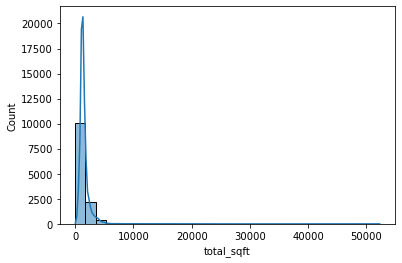

In [45]:
sns.histplot(x='total_sqft', data=df, kde=True, bins=30)

---
we will assume that 300 sq feet / bedroom is a standard threshold

We will remove anything house having less than 300 sq feet per room

In [46]:
df[df['total_sqft'] / df['size'] < 300].head()

,area_type,location,size,total_sqft,bath,balcony,price
58,Plot Area,Murugeshpalya,6,1407.0,4.0,1.0,150.0
68,Plot Area,Devarachikkanahalli,8,1350.0,7.0,0.0,85.0
70,Plot Area,other,3,500.0,3.0,2.0,100.0
78,Built-up Area,Kaval Byrasandra,2,460.0,1.0,0.0,22.0
89,Plot Area,Rajaji Nagar,6,710.0,6.0,3.0,160.0


In [47]:
df.shape

(12710, 7)

In [48]:
df = df[~(df['total_sqft'] / df['size'] < 300)]
df.shape

(12055, 7)

---
Creating a new feature price / sq feet that can help us detect outliers and remove them

In [49]:
# our price is in lakh rupees, so multiply it by 100000 to get the actual value
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [50]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


---
As we can see the minimum value for a property is 267 which is very very low for Bangaluru and also the maximum value is not reasonable enough to keep.

In [51]:
df['price_per_sqft'].describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

--- 
Remove observations which are 1 standard deviation away from the mean

In [52]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [53]:
df = remove_pps_outliers(df)
df.shape

(9848, 8)

In [54]:
df.drop('price_per_sqft', axis=1, inplace=True)

In [55]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0
1,Super built-up Area,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0
2,Super built-up Area,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0
3,Built-up Area,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0
4,Super built-up Area,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0


---
Create Dummy Variables
- Location
- Area type

In [56]:
dummies_location = pd.get_dummies(df.location)
df = pd.concat([df, dummies_location.drop('other', axis='columns')], axis='columns')
df.shape

(9848, 244)

In [57]:
dummies_area_type = pd.get_dummies(df.area_type)
df = pd.concat([df, dummies_area_type.drop('Built-up  Area', axis='columns')], axis='columns')
df.shape

(9848, 247)

In [58]:
df.drop(['location', 'area_type'], axis=1, inplace=True)

In [59]:
X = df.drop('price', axis=1)
y = df.price

## Train Test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8079170067626336

In [62]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.79313078, 0.80482835, 0.8122022 , 0.79173323, 0.82239938])